In [1]:
import pandas as pd
df = pd.read_csv("carPrice.csv")
df.head()

car_ID  symboling   carCompany fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
carCompany          205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
df.shape

(205, 26)

In [16]:
df.head()

car_ID  symboling   carCompany fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [11]:
df.columns

Index(['car_ID', 'symboling', 'carCompany', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
# All the significant variables identified from the model #

df1 = df[['price','symboling','carheight','compressionratio','doornumber','fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'carlength','carwidth', 'enginelocation', 'fuelsystem','peakrpm','citympg','highwaympg','stroke']]
df1.head()
df1.shape

(205, 24)

In [20]:
df1.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
price               205 non-null float64
symboling           205 non-null int64
carheight           205 non-null float64
compressionratio    205 non-null float64
doornumber          205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
wheelbase           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
boreratio           205 non-null float64
horsepower          205 non-null int64
carlength           205 non-null float64
carwidth            205 non-null float64
enginelocation      205 non-null object
fuelsystem          205 non-null object
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

In [8]:
df['cylindernumber'].head()

0    four
1    four
2     six
3    four
4    five
Name: cylindernumber, dtype: object

In [5]:
# Converting the categorical into numerical type

x_dummies  = pd.get_dummies(df1,drop_first=True)
x_dummies.head()

# Numerical features will remaij as it is #
# only categorical variables will cionverted into numerical type, as well it will drop existing feature 

price  symboling  carheight  compressionratio  wheelbase  curbweight  \
0  13495.0          3       48.8               9.0       88.6        2548   
1  16500.0          3       48.8               9.0       88.6        2548   
2  16500.0          1       52.4               9.0       94.5        2823   
3  13950.0          2       54.3              10.0       99.8        2337   
4  17450.0          2       54.3               8.0       99.4        2824   

   enginesize  boreratio  horsepower  carlength  ...  cylindernumber_twelve  \
0         130       3.47         111      168.8  ...                      0   
1         130       3.47         111      168.8  ...                      0   
2         152       2.68         154      171.2  ...                      0   
3         109       3.19         102      176.6  ...                      0   
4         136       3.19         115      176.6  ...                      0   

   cylindernumber_two  enginelocation_rear  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                    0                0                0   
1                   0                    0                0                0   
2                   0                    0                0                0   
3                   0                    0                0                0   
4                   0                    0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 44 columns]

In [23]:
df1['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [21]:
x_dummies.columns

Index(['price', 'symboling', 'carheight', 'compressionratio', 'wheelbase',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'carlength',
       'carwidth', 'peakrpm', 'citympg', 'highwaympg', 'stroke',
       'doornumber_two', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'enginelocation_rear', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [24]:
x_dummies.shape

(205, 44)

In [6]:
# checking the relation between the dependent & independenmt variables with correlation plot #

corrmat = x_dummies.corr()
corrmat

price  symboling  carheight  compressionratio  \
price                  1.000000  -0.079978   0.119336          0.067984   
symboling             -0.079978   1.000000  -0.541038         -0.178515   
carheight              0.119336  -0.541038   1.000000          0.261214   
compressionratio       0.067984  -0.178515   0.261214          1.000000   
wheelbase              0.577816  -0.531954   0.589435          0.249786   
curbweight             0.835305  -0.227691   0.295572          0.151362   
enginesize             0.874145  -0.105790   0.067149          0.028971   
boreratio              0.553173  -0.130051   0.171071          0.005197   
horsepower             0.808139   0.070873  -0.108802         -0.204326   
carlength              0.682920  -0.357612   0.491029          0.158414   
carwidth               0.759325  -0.232919   0.279210          0.181129   
peakrpm               -0.085267   0.273606  -0.320411         -0.435741   
citympg               -0.685751  -0.035823  -0.048640          0.324701   
highwaympg            -0.697599   0.034606  -0.107358          0.265201   
stroke                 0.079443  -0.008735  -0.055307          0.186110   
doornumber_two        -0.031835   0.664073  -0.552208         -0.177888   
fueltype_gas          -0.105679   0.194311  -0.284631         -0.984356   
aspiration_turbo       0.177926  -0.059866   0.087311          0.295541   
carbody_hardtop        0.225854   0.168845  -0.072328          0.029623   
carbody_hatchback     -0.262039   0.435648  -0.477476         -0.202650   
carbody_sedan          0.125716  -0.378341   0.235863          0.188286   
carbody_wagon         -0.042310  -0.298243   0.459148          0.016315   
drivewheel_fwd        -0.601950   0.102839  -0.100273         -0.062683   
drivewheel_rwd         0.638957  -0.076381   0.039814          0.105185   
enginetype_dohcv       0.159225   0.009347  -0.092628         -0.002519   
enginetype_l           0.042267  -0.133979   0.319687          0.219153   
enginetype_ohc        -0.344270  -0.082855   0.036260          0.027545   
enginetype_ohcf        0.016285   0.037513  -0.046670         -0.084328   
enginetype_ohcv        0.385991  -0.013597  -0.065063         -0.086649   
enginetype_rotor      -0.004544   0.245950  -0.238720         -0.026436   
cylindernumber_five    0.249606  -0.090188   0.152982          0.173360   
cylindernumber_four   -0.697762  -0.034161   0.059696         -0.012522   
cylindernumber_six     0.474978  -0.000238  -0.049777         -0.065559   
cylindernumber_three  -0.071388   0.065707  -0.015076         -0.011354   
cylindernumber_twelve  0.199634  -0.047012  -0.170181          0.023986   
cylindernumber_two    -0.004544   0.245950  -0.238720         -0.026436   
enginelocation_rear    0.324973   0.212471  -0.106234         -0.019762   
fuelsystem_2bbl       -0.501374  -0.034069  -0.079418         -0.183384   
fuelsystem_4bbl       -0.017306   0.212471  -0.206225         -0.022838   
fuelsystem_idi         0.105679  -0.194311   0.284631          0.984356   
fuelsystem_mfi        -0.002747   0.122067  -0.101245         -0.055528   
fuelsystem_mpfi        0.517075   0.012532   0.108685         -0.311035   
fuelsystem_spdi       -0.061475   0.181939  -0.278615         -0.153726   
fuelsystem_spfi       -0.019580   0.065707  -0.066778         -0.016654   

                       wheelbase  curbweight  enginesize  boreratio  \
price                   0.577816    0.835305    0.874145   0.553173   
symboling              -0.531954   -0.227691   -0.105790  -0.130051   
carheight               0.589435    0.295572    0.067149   0.171071   
compressionratio        0.249786    0.151362    0.028971   0.005197   
wheelbase               1.000000    0.776386    0.569329   0.488750   
curbweight              0.776386    1.000000    0.850594   0.648480   
enginesize              0.569329    0.850594    1.000000   0.583774   
boreratio               0.488750    0.648480    0.583774   1.000000   
horsepower 

In [26]:
x_dummies.shape

(205, 44)

In [30]:
# Visualization through the heat map to uhnderstand the correlation amoung yhe variabkes#

import matplotlib.pyplot as plt
corrmat.index
import seaborn as sns

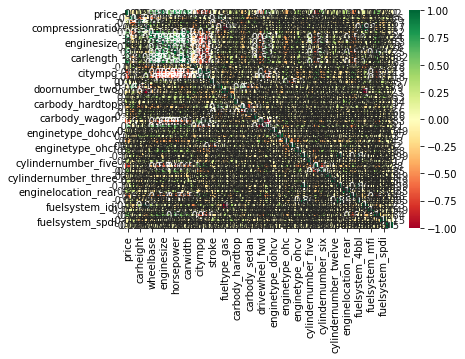

In [7]:
g = sns.heatmap(x_dummies[corrmat.index].corr(),annot=True,cmap='RdYlGn')

In [50]:

# VIF Factor - checkoing for multi collinearity #

# using this steps for dropping highly correlated variables for doing logistic regression #
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

C:\Users\PRAYAG\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor               features
0      3.729848              symboling
1      4.122954              carheight
2    184.331513       compressionratio
3     14.340698              wheelbase
4     33.675355             curbweight
5     49.505517             enginesize
6      7.910548              boreratio
7     32.769609             horsepower
8     15.284346              carlength
9     11.142078               carwidth
10     3.687826                peakrpm
11    39.271860                citympg
12    36.372517             highwaympg
13     3.372270                 stroke
14     3.583152         doornumber_two
15  8347.451461           fueltype_gas
16     4.924978       aspiration_turbo
17     3.014287        carbody_hardtop
18    14.277551      carbody_hatchback
19    18.755490          carbody_sedan
20     9.629068          carbody_wagon
21    11.155078         drivewheel_fwd
22    14.382330         drivewheel_rwd
23     4.501176       enginetype_dohcv
24     6.049283           enginetype_l
25     7.039164         enginetype_ohc
26     7.112689        enginetype_ohcf
27     3.920521        enginetype_ohcv
28          inf       enginetype_rotor
29    15.903954    cylindernumber_five
30    68.930818    cylindernumber_four
31    21.090323     cylindernumber_six
32     4.171206   cylindernumber_three
33     3.960215  cylindernumber_twelve
34          inf     cylindernumber_two
35     3.935689    enginelocation_rear
36     7.373726        fuelsystem_2bbl
37     4.714151        fuelsystem_4bbl
38  1129.943095         fuelsystem_idi
39     1.382385         fuelsystem_mfi
40    10.558518        fuelsystem_mpfi
41     3.401278        fuelsystem_spdi
42     1.296582        fuelsystem_spfi

In [52]:
# Deleting the highly corrleated variables #

M = X.drop(['compressionratio','citympg','highwaympg'],axis=1)
M.head()

symboling  carheight  wheelbase  curbweight  enginesize  boreratio  \
0          3       48.8       88.6        2548         130       3.47   
1          3       48.8       88.6        2548         130       3.47   
2          1       52.4       94.5        2823         152       2.68   
3          2       54.3       99.8        2337         109       3.19   
4          2       54.3       99.4        2824         136       3.19   

   horsepower  carlength  carwidth  peakrpm  ...  cylindernumber_twelve  \
0         111      168.8      64.1     5000  ...                      0   
1         111      168.8      64.1     5000  ...                      0   
2         154      171.2      65.5     5000  ...                      0   
3         102      176.6      66.2     5500  ...                      0   
4         115      176.6      66.4     5500  ...                      0   

   cylindernumber_two  enginelocation_rear  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                    0                0                0   
1                   0                    0                0                0   
2                   0                    0                0                0   
3                   0                    0                0                0   
4                   0                    0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 40 columns]

In [53]:
# VIF Factor - checkoing for multi collinearity #

# using this steps for dropping highly correlated variables for doing logistic regression #
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(M.values, i) for i in range(M.shape[1])]
vif["features"] = M.columns
vif

C:\Users\PRAYAG\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor               features
0      3.326985              symboling
1      4.075121              carheight
2     14.147737              wheelbase
3     31.468350             curbweight
4     46.808567             enginesize
5      7.757688              boreratio
6     30.089929             horsepower
7     14.238691              carlength
8     10.570296               carwidth
9      3.455143                peakrpm
10     3.307698                 stroke
11     3.482016         doornumber_two
12  7681.987598           fueltype_gas
13     4.425802       aspiration_turbo
14     2.889589        carbody_hardtop
15    13.957899      carbody_hatchback
16    18.126169          carbody_sedan
17     9.294229          carbody_wagon
18    10.638418         drivewheel_fwd
19    13.604800         drivewheel_rwd
20     3.982934       enginetype_dohcv
21     4.298735           enginetype_l
22     6.553836         enginetype_ohc
23     6.805047        enginetype_ohcf
24     3.830041        enginetype_ohcv
25          inf       enginetype_rotor
26    15.502735    cylindernumber_five
27    67.548736    cylindernumber_four
28    20.312778     cylindernumber_six
29     3.860602   cylindernumber_three
30     2.398394  cylindernumber_twelve
31          inf     cylindernumber_two
32     3.518954    enginelocation_rear
33     7.243503        fuelsystem_2bbl
34     4.641769        fuelsystem_4bbl
35   834.770204         fuelsystem_idi
36     1.330585         fuelsystem_mfi
37    10.321350        fuelsystem_mpfi
38     2.922162        fuelsystem_spdi
39     1.290546        fuelsystem_spfi

In [56]:
# Dropping the variabkle : Curbweight, as it is highly correlated #

# Deleting the highly corrleated variables #

M1= M.drop(['curbweight'],axis=1)
M1.head()

symboling  carheight  wheelbase  enginesize  boreratio  horsepower  \
0          3       48.8       88.6         130       3.47         111   
1          3       48.8       88.6         130       3.47         111   
2          1       52.4       94.5         152       2.68         154   
3          2       54.3       99.8         109       3.19         102   
4          2       54.3       99.4         136       3.19         115   

   carlength  carwidth  peakrpm  stroke  ...  cylindernumber_twelve  \
0      168.8      64.1     5000    2.68  ...                      0   
1      168.8      64.1     5000    2.68  ...                      0   
2      171.2      65.5     5000    3.47  ...                      0   
3      176.6      66.2     5500    3.40  ...                      0   
4      176.6      66.4     5500    3.40  ...                      0   

   cylindernumber_two  enginelocation_rear  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                    0                0                0   
1                   0                    0                0                0   
2                   0                    0                0                0   
3                   0                    0                0                0   
4                   0                    0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 39 columns]

In [57]:
# VIF Factor - checkoing for multi collinearity #

# using this steps for dropping highly correlated variables for doing logistic regression #
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(M1.values, i) for i in range(M1.shape[1])]
vif["features"] = M1.columns
vif

C:\Users\PRAYAG\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor               features
0      3.322616              symboling
1      4.045040              carheight
2     14.142541              wheelbase
3     37.604878             enginesize
4      7.689942              boreratio
5     29.620586             horsepower
6     12.171099              carlength
7     10.113711               carwidth
8      3.453745                peakrpm
9      3.278911                 stroke
10     3.420665         doornumber_two
11  7131.460249           fueltype_gas
12     4.275092       aspiration_turbo
13     2.637542        carbody_hardtop
14    13.161443      carbody_hatchback
15    16.683035          carbody_sedan
16     9.140105          carbody_wagon
17     8.870657         drivewheel_fwd
18    13.101507         drivewheel_rwd
19     3.959249       enginetype_dohcv
20     4.152548           enginetype_l
21     6.528150         enginetype_ohc
22     6.754178        enginetype_ohcf
23     3.818966        enginetype_ohcv
24          inf       enginetype_rotor
25    14.410600    cylindernumber_five
26    64.333111    cylindernumber_four
27    18.899421     cylindernumber_six
28     3.815264   cylindernumber_three
29     2.384783  cylindernumber_twelve
30          inf     cylindernumber_two
31     3.447505    enginelocation_rear
32     7.217786        fuelsystem_2bbl
33     4.641493        fuelsystem_4bbl
34   779.142249         fuelsystem_idi
35     1.327972         fuelsystem_mfi
36    10.313196        fuelsystem_mpfi
37     2.912626        fuelsystem_spdi
38     1.244219        fuelsystem_spfi

In [59]:
M1.columns
#This are our final independent variables for the model#

Index(['symboling', 'carheight', 'wheelbase', 'enginesize', 'boreratio',
       'horsepower', 'carlength', 'carwidth', 'peakrpm', 'stroke',
       'doornumber_two', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'enginelocation_rear', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [65]:
M2 = M1.drop(['enginetype_dohcv','enginetype_l','enginetype_ohc','enginetype_ohcf','enginetype_ohcv','enginetype_rotor'],axis=1)
M2.head()


symboling  carheight  wheelbase  enginesize  boreratio  horsepower  \
0          3       48.8       88.6         130       3.47         111   
1          3       48.8       88.6         130       3.47         111   
2          1       52.4       94.5         152       2.68         154   
3          2       54.3       99.8         109       3.19         102   
4          2       54.3       99.4         136       3.19         115   

   carlength  carwidth  peakrpm  stroke  ...  cylindernumber_twelve  \
0      168.8      64.1     5000    2.68  ...                      0   
1      168.8      64.1     5000    2.68  ...                      0   
2      171.2      65.5     5000    3.47  ...                      0   
3      176.6      66.2     5500    3.40  ...                      0   
4      176.6      66.4     5500    3.40  ...                      0   

   cylindernumber_two  enginelocation_rear  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                    0                0                0   
1                   0                    0                0                0   
2                   0                    0                0                0   
3                   0                    0                0                0   
4                   0                    0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 33 columns]

In [66]:
# VIF Factor - checkoing for multi collinearity #

# using this steps for dropping highly correlated variables for doing logistic regression #
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(M2.values, i) for i in range(M2.shape[1])]
vif["features"] = M2.columns
vif

VIF Factor               features
0      2.969145              symboling
1      3.577295              carheight
2     11.395000              wheelbase
3     24.840735             enginesize
4      5.152841              boreratio
5     15.544082             horsepower
6     11.057423              carlength
7      9.154919               carwidth
8      3.050231                peakrpm
9      2.250236                 stroke
10     3.374681         doornumber_two
11  6296.775605           fueltype_gas
12     3.037294       aspiration_turbo
13     2.494576        carbody_hardtop
14    12.554749      carbody_hatchback
15    15.582863          carbody_sedan
16     8.463590          carbody_wagon
17     7.961822         drivewheel_fwd
18     9.763486         drivewheel_rwd
19     8.911072    cylindernumber_five
20    42.356318    cylindernumber_four
21    11.498486     cylindernumber_six
22     2.632031   cylindernumber_three
23     2.143860  cylindernumber_twelve
24    10.741735     cylindernumber_two
25     2.037111    enginelocation_rear
26     6.716423        fuelsystem_2bbl
27     4.539337        fuelsystem_4bbl
28   681.940114         fuelsystem_idi
29     1.307543         fuelsystem_mfi
30     9.466377        fuelsystem_mpfi
31     2.802712        fuelsystem_spdi
32     1.221088        fuelsystem_spfi

In [67]:
#As there are lot of features, we can reduce the no. of features by using #PCA or 
# Or else we can also drop the features based on correlation values, highly correlated variables can be dropped #
#taking only the important featires based on their feature importance in predicting the target variable# -#ExtraTreesRegressor 
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()


In [68]:
M2.shape

(205, 33)

In [69]:
Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [70]:
model.fit(M2,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [71]:
model.feature_importances_

array([5.96387552e-03, 7.93450412e-03, 2.26121601e-02, 2.03344180e-01,
       6.51527770e-02, 7.25273690e-02, 2.83619423e-02, 5.32953530e-02,
       1.54419913e-02, 7.34920823e-03, 3.49878385e-03, 2.51810352e-03,
       1.00898991e-02, 3.80490463e-03, 1.73411200e-02, 2.57922760e-03,
       5.10187839e-04, 1.06133188e-02, 4.67091550e-02, 2.76465766e-03,
       3.73838633e-01, 8.31164281e-03, 2.43112715e-04, 3.53651472e-04,
       2.02505698e-04, 5.49702020e-03, 5.13388328e-03, 4.06868755e-04,
       1.93243781e-03, 2.66629872e-05, 2.13669816e-02, 1.98654581e-04,
       7.52272762e-05])

In [72]:
feat_importances = pd.Series(model.feature_importances_*1000,index=M2.columns)
feat_importances
     
#This shows the importance of this features for the target variable#

symboling                  5.963876
carheight                  7.934504
wheelbase                 22.612160
enginesize               203.344180
boreratio                 65.152777
horsepower                72.527369
carlength                 28.361942
carwidth                  53.295353
peakrpm                   15.441991
stroke                     7.349208
doornumber_two             3.498784
fueltype_gas               2.518104
aspiration_turbo          10.089899
carbody_hardtop            3.804905
carbody_hatchback         17.341120
carbody_sedan              2.579228
carbody_wagon              0.510188
drivewheel_fwd            10.613319
drivewheel_rwd            46.709155
cylindernumber_five        2.764658
cylindernumber_four      373.838633
cylindernumber_six         8.311643
cylindernumber_three       0.243113
cylindernumber_twelve      0.353651
cylindernumber_two         0.202506
enginelocation_rear        5.497020
fuelsystem_2bbl            5.133883
fuelsystem_4bbl            0

In [75]:
M2.columns  # Final variables for builidng the algorithm #

Index(['symboling', 'carheight', 'wheelbase', 'enginesize', 'boreratio',
       'horsepower', 'carlength', 'carwidth', 'peakrpm', 'stroke',
       'doornumber_two', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'enginelocation_rear', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [76]:
# Splitting the data into train and test split #

X_train,X_test,Y_train,Y_test = train_test_split(M2,Y,test_size=0.15,random_state=20)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(174, 33)
(174,)
(31, 33)
(31,)


In [77]:
X_train.shape

(174, 33)

In [78]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [79]:
# Building the Linear Regression model using stats OLS method #

import statsmodels.api as sm

X_train1 = sm.add_constant(X_train)

In [80]:
est = sm.OLS(Y_train,X_train1)  # sm.OLS  : Y,X
est1 = est.fit()
print(est1.summary())

#R2 score : 0.89

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     46.79
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           7.01e-60
Time:                        11:18:42   Log-Likelihood:                -1605.8
No. Observations:                 174   AIC:                             3276.
Df Residuals:                     142   BIC:                             3377.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.366e+

C:\Users\PRAYAG\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\PRAYAG\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\PRAYAG\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\PRAYAG\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [81]:
from math import sqrt

In [82]:
Y_pred_train = est1.predict(X_train1)

RMSE = sqrt(mean_squared_error(Y_pred_train,Y_train))
print(RMSE)

2465.3211588360723


In [83]:
X_test2 = sm.add_constant(X_test)

In [84]:
Y_pred = est1.predict(X_test2)
RMSE = sqrt(mean_squared_error(Y_pred,Y_test))
print(RMSE)


2242.223048958862


In [85]:
dtr = DecisionTreeRegressor()
dtr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Parameters we can take for the mpodel#
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

# no. of features to consider at every split #

max_features = ['auto','sqrt']

# max. levels in tree 

max_depth = [5,10,15,20,25,30]

# min. number of sampkes required to split a node #

min_samples_split = [2,5,10,15,20]

# min. number of samples required tro split a leadf node #

min_samples_leaf = [1,2,5,10]

In [64]:
min_samples =4
max_leaf_nodes=11
max_depth=5

In [86]:
# Building a Decision Tree for Regression #

dtr = DecisionTreeRegressor(min_samples_leaf=12)
mo = dtr.fit(X_train,Y_train)
mo

r = mo.score(X_train,Y_train)
print(r)


0.9090885435659684


In [87]:
from math import sqrt

In [88]:
y_train_pred = mo.predict(X_train)

RMSE = sqrt(mean_squared_error(y_train_pred,Y_train))
print(RMSE)


2489.373518470004


In [89]:
y_test_pred = mo.predict(X_test)

RMSE = sqrt(mean_squared_error(y_test_pred,Y_test))
print(RMSE)

# r score = 0.91,

# Error has reduced drastically after dropping the highly correlated variables

2407.7313825219126


In [27]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
# Building the random forest model for #

# Building the random forest regression on this model #

rf = RandomForestRegressor(max_depth=4,n_estimators=40)
mo = rf.fit(X_train,Y_train)
mo

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [109]:
y_train_pred = mo.predict(X_train)

RMSE = sqrt(mean_squared_error(y_train_pred,Y_train))
print(RMSE)

print(mo.score(X_train,Y_train))

1690.400647855311
0.9580803366945195


In [110]:
y_test_pred = mo.predict(X_test)

RMSE = sqrt(mean_squared_error(y_test_pred,Y_test))
print(RMSE)

2234.46867431448


In [155]:
# Creating a hyper parameter tuning with help of Grid search cV to het the best model #
import numpy as np
# no. of trees on random forest 
n_estimators = [5,8,10,15,20,50,60,80,100]

# no. of features to consider at every split #

max_features = ['auto','sqrt']

# max. levels in tree 

max_depth = [3,4,5,6]

# Max_nodes #

max_leaf_nodes= [3,4,5,6]

# min. number of samples required tro split a leadf node #

min_samples_leaf = [4,5,6,8]




In [159]:
params = {'n_estimators' :[5,8,10,15,20,50,60,80,100],'max_features' : ['auto','sqrt'],
         'max_depth':[3,4,5,6,7,10,12],'max_leaf_nodes':[3,4,5,6,7],'min_samples_leaf':[4,5,6,8]}

In [160]:
from sklearn.model_selection import RandomizedSearchCV

In [161]:
rf = RandomForestRegressor()

In [36]:
# Verbose is used to display the results #
# n_jobs : It is used to take all the cores of the cpu
# 

In [162]:
model_rf = RandomizedSearchCV(rf,cv=10,param_distributions=params, scoring='neg_mean_squared_error',verbose=2,random_state=2,n_jobs=1,n_iter=10,)

In [163]:
# Fitting the model #

a = model_rf.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.2s
[CV] n_estimators=60, min_samples_leaf=6, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV] 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.9s finished


In [164]:
# Best parameters #

a.best_params_ 

{'n_estimators': 60,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 7,
 'max_features': 'auto',
 'max_depth': 7}

In [165]:
a.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=7,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [166]:
c = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=7,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [167]:
m = c.fit(X_train,Y_train)

In [168]:
m.score(X_train,Y_train)

# Explained variance in the model : 0.931

0.9311498608158373

In [178]:
# Preduction for te x_test data #

y_pred = model_rf.predict(X_test)

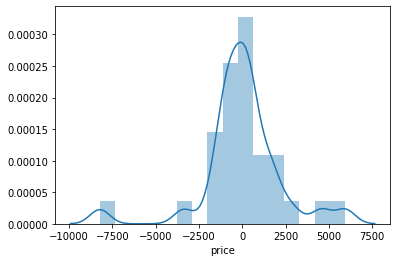

In [179]:
# Compare the performance of thes tested data #

sns.distplot(Y_test-y_pred)
# As the distribution follows a normal distributuon, hence we ccan say that difference for majority of obs. is equals to zero
# Hence the y_pred is alsmost equibaklent to y_test

In [180]:
y_pred_train = model_rf.predict(X_train)

In [181]:
# checking tghe RMSE for train and test #

# Checkong yhe MSE Error in the train data

RMSE = sqrt(mean_squared_error(y_pred_train,Y_train))
print(RMSE)

2175.0474591927987


In [182]:
# checking tghe RMSE for train and test #

# Checkong yhe MSE Error in the train data

RMSE = sqrt(mean_squared_error(y_pred,Y_test))
print(RMSE)

2323.5243215662936


In [135]:
# Appyling the grid search CV to check the performance od this model #

from sklearn.model_selection import GridSearchCV

In [139]:
model_gf = GridSearchCV(rf,cv=10,param_grid=params, scoring='neg_mean_squared_error',verbose=2,n_jobs=1)

In [140]:
mo_gr = model_gf.fit(X_train,Y_train)

Fitting 10 folds for each of 2520 candidates, totalling 25200 fits
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=5, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8 
[CV]  max_depth=3, max_features=auto, max_leaf_nodes=3, min_samples_leaf=4, n_estimators=8, total=   0.0s
[CV] max_depth

[Parallel(n_jobs=1)]: Done 25200 out of 25200 | elapsed: 46.7min finished


In [141]:
# Best parameters dfor the model #

print(mo_gr.best_params_)
print(mo_gr.best_estimator_)
print(mo_gr.best_score_)


{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 7, 'min_samples_leaf': 5, 'n_estimators': 8}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=7,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=8, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
-6272035.02933423


In [142]:
cm = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=7,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=8, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [143]:
e = cm.fit(X_train,Y_train)

In [144]:
e.score(X_train,Y_train)

# Score of R2 Value : 93.2% shows the variance explained by this model #

0.9320255624937389

In [146]:
#Predicting the output fior x_test #

y_pred_train = model_gf.predict(X_train)

In [147]:
#Predicting the output fior x_test #

y_pred = model_gf.predict(X_test)

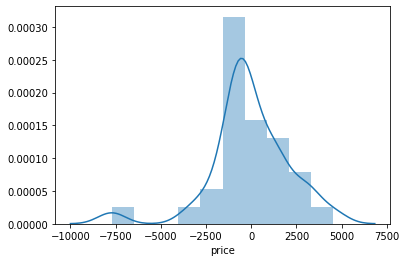

In [148]:
#Checking the performance of this model with helo of sns plot #

sns.distplot(Y_test-y_pred)
# distribution follows the normal curve with mean =0 & it shows model perfoms good 

In [149]:
# Checkong yhe MSE Error in the train data

RMSE = sqrt(mean_squared_error(y_pred_train,Y_train))
print(RMSE)

2172.8099801412795


In [150]:
# Checkong yhe MSE Error in the test data


RMSE = sqrt(mean_squared_error(y_pred,Y_test))
print(RMSE)

# Both the RMSE of trin and test are very close, whoch shows there is no overfitting #

# Hence comparing both the gridsearcg and randomsearch CV, we can say that the grid search Cv performs better 

2205.1106395718534


In [183]:
# Grid Search, with Randome Forest parameters : {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 7, 'min_samples_leaf': 5, 'n_estimators': 8}
# Gave an R2 square : 93.2%
# RMSE_train :2172
# RMSE_test :2205

In [ ]:
# Saving the model #


In [152]:
# fitting the model #

from sklearn.neighbors import KNeighborsRegressor
knn =  KNeighborsRegressor()

mo_k = knn.fit(X_train,Y_train)# # Identifyiong the score on training set #

# Predictoing the train accuracy #

r2 = mo_k.score(X_train,Y_train)

r2

0.842751057506873

In [153]:
# Predicting on the train data set #
y_train_pred = mo_k.predict(X_train)

RMSE = sqrt(mean_squared_error(y_train_pred,Y_train))
print(RMSE)

3273.9694629894666


In [154]:
# Predicting on the test data set #
y_test_pred = mo_k.predict(X_test)

RMSE = sqrt(mean_squared_error(y_test_pred,Y_test))
print(RMSE)

# test erro : 0.093, r2 : 0.798 and difference between train and test error : 0.003

2624.1202872153826


In [155]:
# Building the model using the KNN Nearest neigbors apporach #


acc_rate = []
RMSE_train=[]
RMSE_test=[]
for i in range(10,20):
    knn = KNeighborsRegressor(n_neighbors=i)
    mo=knn.fit(X_train,Y_train)
    r2= mo.score(X_train,Y_train)
    acc_rate.append(r2)
    y_train_pred = mo.predict(X_train)
    a = sqrt(mean_squared_error(y_train_pred,Y_train))
    RMSE_train.append(a)
    y_test_pred = mo.predict(X_test)
    b = sqrt(mean_squared_error(y_test_pred,Y_test))
    RMSE_test.append(b)

print(acc_rate)
print(RMSE_train)
print(RMSE_test)

# From the model, we can conclude the we need to go with k=10 as the nearest neighbors #

[0.5172487802749488, 0.47829825331509673, 0.4616183141561669, 0.4524198250697208, 0.43964936377433056, 0.415984643867563, 0.3920792547216179, 0.39587359631508284, 0.38381174217210656, 0.378522123949239]
[5736.43989445723, 5963.372015772728, 6057.9529587674615, 6109.485180370231, 6180.316158256369, 6309.470162486386, 6437.307268429275, 6417.186574200671, 6480.932028645926, 6508.690102418103]
[4171.692971118478, 4463.472904999757, 4495.968054202006, 4438.540044064535, 4458.43950993253, 4486.17968338399, 4525.266259919916, 4471.798618760357, 4449.63004299784, 4522.037741798937]
